In [1]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Files to load
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

In [3]:
# Read the city data file and store it in a pandas DataFrame.
city_data_df = pd.read_csv(city_data_to_load)
city_data_df.head(10)

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
5,West Anthony,70,Urban
6,West Angela,48,Urban
7,Martinezhaven,25,Urban
8,Karenberg,22,Urban
9,Barajasview,26,Urban


In [4]:
# Read the ride data file and store it in a pandas DataFrame.
ride_data_df = pd.read_csv(ride_data_to_load)
ride_data_df.head(10)

,city,date,fare,ride_id
0,Lake Jonathanshire,1/14/2019 10:14,13.83,5.739410e+12
1,South Michelleport,3/4/2019 18:24,30.24,2.343910e+12
2,Port Samanthamouth,2/24/2019 4:29,33.44,2.005070e+12
3,Rodneyfort,2/10/2019 23:22,23.44,5.149250e+12
4,South Jack,3/6/2019 4:28,34.58,3.908450e+12
5,South Latoya,3/11/2019 12:26,9.52,1.995000e+12
6,New Paulville,2/27/2019 11:17,43.25,7.932080e+11
7,Simpsonburgh,4/26/2019 0:43,35.98,1.119540e+11
8,South Karenland,1/8/2019 3:28,35.09,7.995620e+12
9,North Jasmine,3/9/2019 6:26,42.81,5.327640e+12


In [5]:
# Get the columns and the rows that are not null.
city_data_df.count()

city            120
driver_count    120
type            120
dtype: int64

In [6]:
# Get the columns and the rows that are not null.
city_data_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [7]:
# Get the data types of each column.
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [8]:
# Get the unique values of the type of city.
city_data_df["type"].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [9]:
# Get the number of data points from the Urban cities.
sum(city_data_df["type"]=="Urban")

66

In [10]:
# Get the number of data points from the Urban cities.
sum(city_data_df["type"]=="Suburban")

36

In [11]:
# Get the number of data points from the Urban cities.
sum(city_data_df["type"]=="Rural")

18

In [12]:
# Get the columns and the rows that are not null.
ride_data_df.count()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [13]:
# Get the columns and the rows that are not null.
ride_data_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [14]:
# Get the data types of each column.
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id    float64
dtype: object

In [15]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the DataFrame
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,1/14/2019 10:14,13.83,5.739410e+12,5,Urban
1,South Michelleport,3/4/2019 18:24,30.24,2.343910e+12,72,Urban
2,Port Samanthamouth,2/24/2019 4:29,33.44,2.005070e+12,57,Urban
3,Rodneyfort,2/10/2019 23:22,23.44,5.149250e+12,34,Urban
4,South Jack,3/6/2019 4:28,34.58,3.908450e+12,46,Urban


In [16]:
pyber_data_df.dtypes

city             object
date             object
fare            float64
ride_id         float64
driver_count      int64
type             object
dtype: object

In [17]:
# Total Rides
total_rides = pyber_data_df.groupby(["type"]).count()["ride_id"]
total_rides


type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [18]:
# Total Drivers
total_drivers= city_data_df.groupby(["type"]).sum()["driver_count"]
total_drivers

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [19]:
# Total Fares
total_fares= pyber_data_df.groupby(["type"]).sum()["fare"]
total_fares

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [20]:
# Average Fare per Ride.
average_fare_per_ride = total_fares / total_rides
average_fare_per_ride

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
dtype: float64

In [21]:
# Average Fare per Driver
average_fare_per_driver = total_fares / total_drivers
average_fare_per_driver

type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
dtype: float64

In [22]:
# Pyber Summary DataFrame
pyber_summary_df = pd.DataFrame({
    "Total Rides": total_rides,
    "Total Drivers": total_drivers,
    "Total Fares": total_fares,
    "Average Fare per Ride": average_fare_per_ride,
    "Average Fare per Driver": average_fare_per_driver})
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
type,,,,,
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [23]:
pyber_summary_df.dtypes

Total Rides                  int64
Total Drivers                int64
Total Fares                float64
Average Fare per Ride      float64
Average Fare per Driver    float64
dtype: object

In [24]:
# Format the Total Rides DataFrame to include comma for thousands separator.
pyber_summary_df["Total Rides"] = pyber_summary_df["Total Rides"].map("{:,}".format)
pyber_summary_df                                                                  

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
type,,,,,
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,"1,625",2405,39854.38,24.525772,16.571468


In [25]:
# Format the Total Drivers DataFrame to include comma for thousands separator.
pyber_summary_df["Total Drivers"] = pyber_summary_df["Total Drivers"].map("{:,}".format)
pyber_summary_df  

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
type,,,,,
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,"1,625","2,405",39854.38,24.525772,16.571468


In [26]:
# Format the Total Fares DataFrame to include comma for thousands separator, a decimal separator, and a "$".
pyber_summary_df["Total Fares"] = pyber_summary_df["Total Fares"].map("${:,.2f}".format)
pyber_summary_df        

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
type,,,,,
Rural,125,78,"$4,327.93",34.623440,55.486282
Suburban,625,490,"$19,356.33",30.970128,39.502714
Urban,"1,625","2,405","$39,854.38",24.525772,16.571468


In [27]:
# Format the Average Fare per Ride to include comma for thousands separator, a decimal separator, and a "$".
pyber_summary_df["Average Fare per Ride"] = pyber_summary_df["Average Fare per Ride"].map("${:,.2f}".format)
pyber_summary_df  

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
type,,,,,
Rural,125,78,"$4,327.93",$34.62,55.486282
Suburban,625,490,"$19,356.33",$30.97,39.502714
Urban,"1,625","2,405","$39,854.38",$24.53,16.571468


In [28]:
# Format the Average Fare per Driver to include comma for thousands separator, a decimal separator, and a "$".
pyber_summary_df["Average Fare per Driver"] = pyber_summary_df["Average Fare per Driver"].map("${:,.2f}".format)
pyber_summary_df  

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
type,,,,,
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,"1,625","2,405","$39,854.38",$24.53,$16.57


In [29]:
# Remove the index name.
pyber_summary_df.index.name = None

In [30]:
# Display the DataFrame.
pyber_summary_df  

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,"1,625","2,405","$39,854.38",$24.53,$16.57


In [31]:
%matplotlib inline

In [32]:
# Dependencies
import numpy as np
import statistics

In [35]:
pyber_data_df.head()

,City,Date,Fare,Ride Id,No. Drivers,City Type
0,Lake Jonathanshire,1/14/2019 10:14,13.83,5.739410e+12,5,Urban
1,South Michelleport,3/4/2019 18:24,30.24,2.343910e+12,72,Urban
2,Port Samanthamouth,2/24/2019 4:29,33.44,2.005070e+12,57,Urban
3,Rodneyfort,2/10/2019 23:22,23.44,5.149250e+12,34,Urban
4,South Jack,3/6/2019 4:28,34.58,3.908450e+12,46,Urban


In [38]:
# 1.Rename columns
pyber_data_df.rename(columns={'city':'City','date':'Date','fare':'Fare','ride_id':'Ride Id','driver_count':'No. Drivers', 
    'type':'City Type'}, inplace=True)

pyber_data_df.head()

,City,Date,Fare,Ride Id,No. Drivers,City Type
0,Lake Jonathanshire,1/14/2019 10:14,13.83,5.739410e+12,5,Urban
1,South Michelleport,3/4/2019 18:24,30.24,2.343910e+12,72,Urban
2,Port Samanthamouth,2/24/2019 4:29,33.44,2.005070e+12,57,Urban
3,Rodneyfort,2/10/2019 23:22,23.44,5.149250e+12,34,Urban
4,South Jack,3/6/2019 4:28,34.58,3.908450e+12,46,Urban


In [39]:
# 2.Set the index to the Date column.
pyber_data_df.set_index('Date', inplace=True)
pyber_data_df.head()

,City,Fare,Ride Id,No. Drivers,City Type
Date,,,,,
1/14/2019 10:14,Lake Jonathanshire,13.83,5.739410e+12,5,Urban
3/4/2019 18:24,South Michelleport,30.24,2.343910e+12,72,Urban
2/24/2019 4:29,Port Samanthamouth,33.44,2.005070e+12,57,Urban
2/10/2019 23:22,Rodneyfort,23.44,5.149250e+12,34,Urban
3/6/2019 4:28,South Jack,34.58,3.908450e+12,46,Urban


In [40]:
# 3.Create a new DataFrame, like the one below, for fares, and include only the City Type and Fare columns 
# using the copy() method on the merged DataFrame.
pyber_data_df.copy()

,City,Fare,Ride Id,No. Drivers,City Type
Date,,,,,
1/14/2019 10:14,Lake Jonathanshire,13.83,5.739410e+12,5,Urban
3/4/2019 18:24,South Michelleport,30.24,2.343910e+12,72,Urban
2/24/2019 4:29,Port Samanthamouth,33.44,2.005070e+12,57,Urban
2/10/2019 23:22,Rodneyfort,23.44,5.149250e+12,34,Urban
3/6/2019 4:28,South Jack,34.58,3.908450e+12,46,Urban
...,...,...,...,...,...
4/29/2019 17:04,Michaelberg,13.38,8.550370e+12,6,Rural
1/30/2019 0:05,Lake Latoyabury,20.76,9.018730e+12,2,Rural
2/10/2019 21:03,North Jaime,11.11,2.781340e+12,1,Rural


In [41]:
fare_by_city_type_df = pyber_data_df.copy()
fare_by_city_type_df.head()

,City,Fare,Ride Id,No. Drivers,City Type
Date,,,,,
1/14/2019 10:14,Lake Jonathanshire,13.83,5.739410e+12,5,Urban
3/4/2019 18:24,South Michelleport,30.24,2.343910e+12,72,Urban
2/24/2019 4:29,Port Samanthamouth,33.44,2.005070e+12,57,Urban
2/10/2019 23:22,Rodneyfort,23.44,5.149250e+12,34,Urban
3/6/2019 4:28,South Jack,34.58,3.908450e+12,46,Urban


In [42]:
fare_by_city_type_df.drop(['City','Ride Id','No. Drivers'], axis=1)

,Fare,City Type
Date,,
1/14/2019 10:14,13.83,Urban
3/4/2019 18:24,30.24,Urban
2/24/2019 4:29,33.44,Urban
2/10/2019 23:22,23.44,Urban
3/6/2019 4:28,34.58,Urban
...,...,...
4/29/2019 17:04,13.38,Rural
1/30/2019 0:05,20.76,Rural
2/10/2019 21:03,11.11,Rural


In [43]:
fare_by_city_type_df=fare_by_city_type_df[['City Type','Fare']]
fare_by_city_type_df.head()

,City Type,Fare
Date,,
1/14/2019 10:14,Urban,13.83
3/4/2019 18:24,Urban,30.24
2/24/2019 4:29,Urban,33.44
2/10/2019 23:22,Urban,23.44
3/6/2019 4:28,Urban,34.58


In [49]:
# 5.Calculate the sum() of fares by the type of city and date using groupby() to create a Series.
sum_of_fare_by_city_type = fare_by_city_type_df.groupby(['Date','City Type']).sum()["Fare"]
sum_of_fare_by_city_type

Date            City Type
1/1/2019 0:08   Urban        37.91
1/1/2019 0:46   Suburban     47.74
1/1/2019 12:32  Suburban     25.56
1/1/2019 14:40  Urban         5.42
1/1/2019 14:42  Urban        12.31
                             ...  
5/8/2019 1:54   Urban        32.69
5/8/2019 2:31   Urban        41.33
5/8/2019 4:20   Urban        21.99
5/8/2019 4:39   Urban        18.45
5/8/2019 7:29   Urban        18.55
Name: Fare, Length: 2364, dtype: float64

In [50]:
# 6.Convert the groupby Series into a DataFrame
fare_summary_df = sum_of_fare_by_city_type.to_frame()
fare_summary_df.head()

,,Fare
Date,City Type,
1/1/2019 0:08,Urban,37.91
1/1/2019 0:46,Suburban,47.74
1/1/2019 12:32,Suburban,25.56
1/1/2019 14:40,Urban,5.42
1/1/2019 14:42,Urban,12.31


In [51]:
# 7.Reset the index, then create a pivot table DataFrame with the Date as the index 
# and columns = 'City Type'. The Fare for each Date should appear in each row.
fare_summary_df.pivot_table(index='Date',columns='City Type')

Fare                
City Type      Rural Suburban  Urban
Date                                
1/1/2019 0:08    NaN      NaN  37.91
1/1/2019 0:46    NaN    47.74    NaN
1/1/2019 12:32   NaN    25.56    NaN
1/1/2019 14:40   NaN      NaN   5.42
1/1/2019 14:42   NaN      NaN  12.31
...              ...      ...    ...
5/8/2019 1:54    NaN      NaN  32.69
5/8/2019 2:31    NaN      NaN  41.33
5/8/2019 4:20    NaN      NaN  21.99
5/8/2019 4:39    NaN      NaN  18.45
5/8/2019 7:29    NaN      NaN  18.55

[2361 rows x 3 columns]

In [63]:
fare_summary_pivot_df = fare_summary_df.pivot_table(index='Date',columns='City Type')
fare_summary_pivot_df.head()

Fare                
City Type      Rural Suburban  Urban
Date                                
1/1/2019 0:08    NaN      NaN  37.91
1/1/2019 0:46    NaN    47.74    NaN
1/1/2019 12:32   NaN    25.56    NaN
1/1/2019 14:40   NaN      NaN   5.42
1/1/2019 14:42   NaN      NaN  12.31

In [64]:
# 8.Create a new DataFrame from the pivot table DataFrame on the given dates, '2019-01-01':'2019-04-28', using loc.
fare_summary_pivot_df.loc['1/1/2019':'4/28/2019']

Fare                
City Type       Rural Suburban  Urban
Date                                 
1/1/2019 0:08     NaN      NaN  37.91
1/1/2019 0:46     NaN    47.74    NaN
1/1/2019 12:32    NaN    25.56    NaN
1/1/2019 14:40    NaN      NaN   5.42
1/1/2019 14:42    NaN      NaN  12.31
...               ...      ...    ...
4/27/2019 6:02  38.33      NaN    NaN
4/27/2019 6:20    NaN    28.29    NaN
4/27/2019 7:18    NaN    18.56    NaN
4/27/2019 7:34    NaN    30.28    NaN
4/27/2019 8:48    NaN      NaN  12.84

[2038 rows x 3 columns]

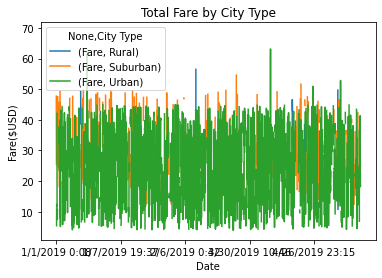

In [81]:
# 10. Using the object-oriented interface method, plot the DataFrame you created in Step 9 using the df.plot() function. Things to consider with your plotting:
fare_summary_pivot_df.plot()
plt.title("Total Fare by City Type")
plt.xlabel("Date")
plt.ylabel("Fare($USD)")
plt.savefig("analysis/ChallengeFig1.png")